# SolubilityAnalysis

#### Contents of notebook:

#### 1. Data cleaning

#### 2. Exploratory data analysis

#### 3. Modeling solubility

#### 4. Predicting molecule's solubility class


#### Data source:

Data was collected from publication of Sorkun et al. (2019). Link to database: https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/OVHAW8

" AqSolDB: A curated reference set of aqueous solubility, created by the Autonomous Energy Materials Discovery [AMD] research group, consists of aqueous solubility values of 9,982 unique compounds curated from 9 different publicly available aqueous solubility datasets. AqSolDB also contains some relevant topological and physico-chemical 2D descriptors. Additionally, AqSolDB contains validated molecular representations of each of the compounds. This openly accessible dataset, which is the largest of its kind, and will not only serve as a useful reference source of measured and calculated solubility data, but also as a much improved and generalizable training data source for building data-driven models. (2019-04-10) "

#### Information on solubility-values:

“Compounds can be classified according to solubility values (LogS); Compounds with 0 and higher solubility value are highly soluble, those in the range of 0 to −2 are soluble, those in the range of −2 to −4 are slightly soluble and insoluble if less than −4."


### 1. Data Cleaning

In [1]:
# tools for handling data
import pandas as pd
import numpy as np

# tools for visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Loading data

# NOTE: I have added my own categorical feature "Solubility_class" to the original data.
# csv-file I am using can be found from github: aainonen/SolubilityAnalysis

df = pd.read_csv("solubility_classification.csv")
df.head(5) #check first 5 rows and get data dimensions (27 columns)

ID                                               Name  \
0  A-356                                            ethanol   
1  A-385              sodium (methylcarbamothioyl)sulfanide   
2  A-441                          tetrabutylazanium bromide   
3  A-452  2-(4,5-diamino-1H-pyrazol-1-yl)ethan-1-ol; sul...   
4  A-453                   disodium benzene-1,3-disulfonate   

                                               InChI  \
0                  InChI=1S/C2H6O/c1-2-3/h3H,2H2,1H3   
1  InChI=1S/C2H5NS2.Na/c1-3-2(4)5;/h1H3,(H2,3,4,5...   
2  InChI=1S/C16H36N.BrH/c1-5-9-13-17(14-10-6-2,15...   
3  InChI=1S/C5H10N4O.H2O4S/c6-4-3-8-9(1-2-10)5(4)...   
4  InChI=1S/C6H6O6S2.2Na/c7-13(8,9)5-2-1-3-6(4-5)...   

                      InChIKey  \
0  LFQSCWFLJHTTHZ-UHFFFAOYSA-N   
1  AFCCDDWKHLHPDF-UHFFFAOYSA-M   
2  JRMUNVKIHCOMHV-UHFFFAOYSA-M   
3  IBCDZZHMNXXYAP-UHFFFAOYSA-N   
4  XWPWZOJBTOJEGW-UHFFFAOYSA-L   

                                              SMILES  Solubility        SD  \
0                                                CCO    1.233668  0.096863   
1                                  [Na+].CNC([S-])=S    0.747325  0.000000   
2                     [Br-].CCCC[N+](CCCC)(CCCC)CCCC    1.332025  0.000000   
3                       Nc1cnn(CCO)c1N.O[S](O)(=O)=O    0.444259  0.000000   
4  [Na+].[Na+].[O-][S](=O)(=O)c1cccc(c1)[S]([O-])...    0.370947  0.000000   

   Ocurrences iGroup    MolWt  ...  NumValenceElectrons  NumAromaticRings  \
0           3     G5   46.069  ...                   20                 0   
1           1     G1  129.185  ...                   30                 0   
2           1     G1  322.375  ...                  112                 0   
3           1     G1  240.241  ...                   88                 1   
4           1     G1  282.206  ...                   78                 1   

   NumSaturatedRings  NumAliphaticRings  RingCount    TPSA   LabuteASA  \
0                  0                  0          0   20.23   19.898427   
1                  0                  0          0   12.03   70.581302   
2                  0                  0          0    0.00  126.695890   
3                  0                  0          1  164.69   85.880241   
4                  0                  0          1  114.40  137.515474   

       BalabanJ     BertzCT  Solubility_class  
0  1.632993e+00    2.754888                 1  
1  0.000000e+00   46.812744                 1  
2  0.000000e+00  121.666175                 1  
3  3.360000e-07  391.554929                 1  
4  0.000000e+00  502.886422                 1  

[5 rows x 27 columns]

In [3]:
df.info() # data is clean; there are no empty values in any rows of the dataframe

# there are quite many string-datatypes (e.g. ID, Name) that I am not going to use in analysis.

# database is quite large; there are 9982 entrys

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9982 entries, 0 to 9981
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   9982 non-null   object 
 1   Name                 9982 non-null   object 
 2   InChI                9982 non-null   object 
 3   InChIKey             9982 non-null   object 
 4   SMILES               9982 non-null   object 
 5   Solubility           9982 non-null   float64
 6   SD                   9982 non-null   float64
 7   Ocurrences           9982 non-null   int64  
 8   iGroup               9982 non-null   object 
 9   MolWt                9982 non-null   float64
 10  MolLogP              9982 non-null   float64
 11  MolMR                9982 non-null   float64
 12  HeavyAtomCount       9982 non-null   int64  
 13  NumHAcceptors        9982 non-null   int64  
 14  NumHDonors           9982 non-null   int64  
 15  NumHeteroatoms       9982 non-null   i

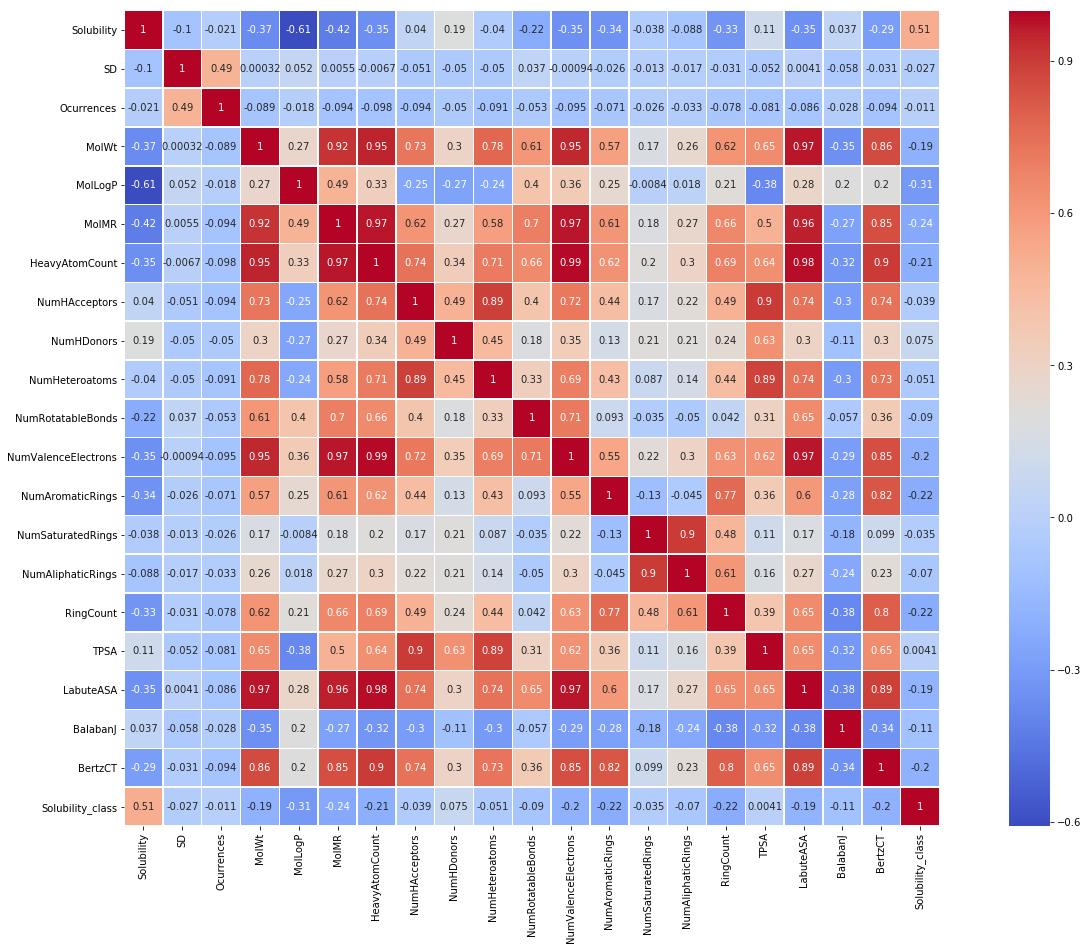

In [4]:
# Correlation matrix to visualize important features

corrMatrix = df.corr()

fig, ax = plt.subplots(figsize=(25,15))
sns.heatmap(corrMatrix, annot=True, linewidths=.5, ax=ax,
           square=True,  cmap='coolwarm')


From correlation table above we can try leave out some features that don't have strong correlations with Solubility.
I will use |0.05| as a cut-off value, and therefore leave out following features:

- Ocurrences
- NumHAcceptors
- NumHeteroatoms
- NumSaturatedRings
- BalabanJ

In real world we probably would not have MolLogP-values available, if we don't either have solubility-values.
Therefore "MolLogP"-feature can be also dropped even though it has best correlation with solubility.

Also "SD" was a statistic feature describing confidence on solubility values collected in AqSolDB. "SD" can be left out.

In [5]:
# Dropping features that don't have strong correlation with solubility

df.drop(['Ocurrences','NumHAcceptors','NumHeteroatoms','NumSaturatedRings','BalabanJ'],axis=1,inplace=True)

# Dropping MolLogP and SD
df.drop(['MolLogP','SD'],axis=1,inplace=True)

In [6]:
# Non-numerical features are left out

df.drop(['ID','Name','InChI','InChIKey','SMILES','iGroup'],axis=1,inplace=True)

In [7]:
# Checking dataframe structure after cleaning

df.head()

# Modelling can be done on solubility-values ("Solubility"), or on solubility classes ("Solubility_class")

Solubility    MolWt    MolMR  HeavyAtomCount  NumHDonors  \
0    1.233668   46.069  12.7598               3           1   
1    0.747325  129.185  29.0227               6           1   
2    1.332025  322.375  79.3604              18           0   
3    0.444259  240.241  52.3150              15           5   
4    0.370947  282.206  42.3684              16           0   

   NumRotatableBonds  NumValenceElectrons  NumAromaticRings  \
0                  0                   20                 0   
1                  0                   30                 0   
2                 12                  112                 0   
3                  2                   88                 1   
4                  2                   78                 1   

   NumAliphaticRings  RingCount    TPSA   LabuteASA     BertzCT  \
0                  0          0   20.23   19.898427    2.754888   
1                  0          0   12.03   70.581302   46.812744   
2                  0          0    0.00  126.695890  121.666175   
3                  0          1  164.69   85.880241  391.554929   
4                  0          1  114.40  137.515474  502.886422   

   Solubility_class  
0                 1  
1                 1  
2                 1  
3                 1  
4                 1

### 2. Exploratory data analysis

In [8]:
# Statistical descriptions

df.describe()

Solubility        MolWt        MolMR  HeavyAtomCount   NumHDonors  \
count  9982.000000  9982.000000  9982.000000     9982.000000  9982.000000   
mean     -2.889909   266.665946    66.794594       17.374674     1.108595   
std       2.368154   184.179024    46.523021       12.241536     1.488973   
min     -13.171900     9.012000     0.000000        1.000000     0.000000   
25%      -4.326325   162.276000    40.602475       11.000000     0.000000   
50%      -2.618173   228.682000    58.633400       15.000000     1.000000   
75%      -1.209735   320.436000    81.938000       21.000000     2.000000   
max       2.137682  5299.456000  1419.351700      388.000000    26.000000   

       NumRotatableBonds  NumValenceElectrons  NumAromaticRings  \
count        9982.000000          9982.000000       9982.000000   
mean            4.073031            94.243438          1.068323   
std             5.646925            64.748563          1.309427   
min             0.000000             0.000000          0.000000   
25%             1.000000            58.000000          0.000000   
50%             3.000000            82.000000          1.000000   
75%             5.000000           112.000000          2.000000   
max           141.000000          2012.000000         35.000000   

       NumAliphaticRings    RingCount         TPSA    LabuteASA       BertzCT  \
count        9982.000000  9982.000000  9982.000000  9982.000000   9982.000000   
mean            0.447606     1.515929    62.458601   108.912586    467.336782   
std             1.054667     1.644334    63.348307    76.462726    546.631696   
min             0.000000     0.000000     0.000000     7.504228      0.000000   
25%             0.000000     0.000000    26.300000    66.623721    163.243343   
50%             0.000000     1.000000    50.720000    93.299873    351.640433   
75%             1.000000     2.000000    80.390000   129.118374    606.562848   
max            30.000000    36.000000  1214.340000  2230.685124  20720.267710   

       Solubility_class  
count       9982.000000  
mean           0.105991  
std            0.307841  
min            0.000000  
25%            0.000000  
50%            0.000000  
75%            0.000000  
max            1.000000

Solubility_class has two values: "1" stands for "highly soluble" and "0" stands for all the other solubility classes.

In Sorkun et al. (2019) article solubilites were categorized as:

1. highly soluble: solubility values (0, positive infinite]

2. soluble: solubility values (-2, 0]

3. slightly soluble: solubility values (-4,-2]

4. insoluble: solubility values (negative infine, -4]

Therefore I will try to analyze solubilities also based on these four classes.


Text(0.5, 1.0, 'Distribution of solubility classes')

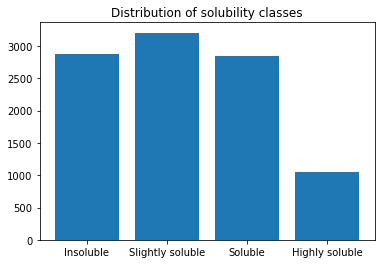

In [9]:
# Plotting distribution of solubility classes

# Creating solubility categories based on solubility-values
cat = pd.cut(df['Solubility'], bins=[-1000,-4,-2,0,1000], 
                    labels=['Insoluble', 'Slightly soluble', 'Soluble','Highly soluble'])

cat = pd.DataFrame(cat) #create dataframe so that pandas techniques are available

# Counts of each category
Insoluble_val = (cat.Solubility == 'Insoluble').sum()
Slight_val = (cat.Solubility == 'Slightly soluble').sum()
Soluble_val = (cat.Solubility == 'Soluble').sum()
Highly_val = (cat.Solubility == 'Highly soluble').sum()

# Data for bar chart
plotData = {'Insoluble': Insoluble_val, 'Slightly soluble': Slight_val,
            'Soluble': Soluble_val, 'Highly soluble': Highly_val}

sol_cat = list(plotData.keys())
cat_counts = list(plotData.values())

# Bar chart
fig, ax = plt.subplots()
ax.bar(sol_cat,cat_counts)
ax.set_title('Distribution of solubility classes')

Other categories are balanced except for highly soluble, which does not have even half of the values in other categories. Yet there are still quite many datapoints (~1000) for highly soluble category.

There won't be enough observations for all machine learning algorithms (those algorithms that require tens of thousands of observations).

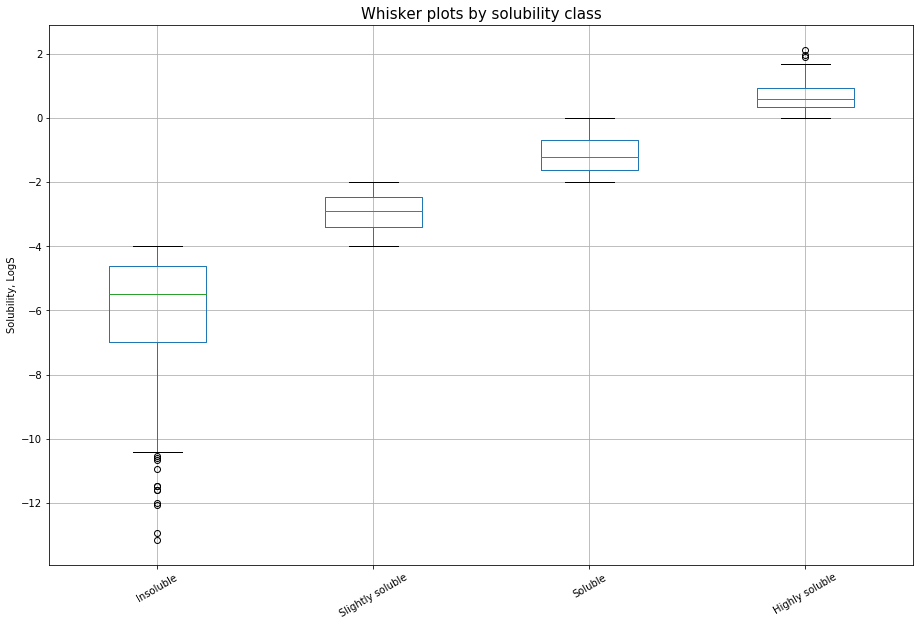

In [10]:
# Whisker plot

import warnings
warnings.filterwarnings('ignore')

df['categ'] = pd.cut(df['Solubility'], bins=[-1000,-4,-2,0,1000], 
                    labels=['Insoluble', 'Slightly soluble', 'Soluble','Highly soluble'])

boxplot = df.boxplot(column=['Solubility'], by='categ', return_type=None)


# get rid of "boxplot grouped by" title
plt.suptitle("")

# label adjustment
p = plt.gca()
p.set_xlabel("")
p.set_ylabel("Solubility, LogS")
p.set_title("Whisker plots by solubility class", fontsize=15)
p.tick_params(axis='y', labelsize=10)
p.tick_params(axis='x', labelsize=10, labelrotation = 30)


fig = plt.gcf()
fig.set_size_inches(15, 10)

In [11]:
warnings.filterwarnings('default') # warnings back on

### PCA visualization

In [12]:
# Extracting the solubility targets
#y = pd.DataFrame({'Solubility_class': df['Solubility_class']})

# Predictors are collected to x-matrix

x = df
x = x.drop(['Solubility','Solubility_class','categ'],axis=1) #drop target columns

predictor_columns = x.columns.values.tolist() # column names of x

In [13]:
# Feature Scaling

import sklearn
from sklearn.preprocessing import scale

x = scale(x)

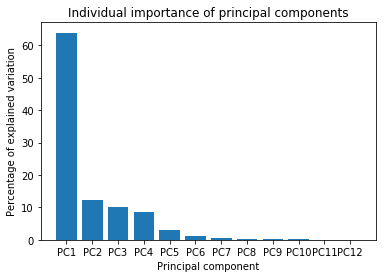

In [14]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(x) # for all of the scaled data
pca_data = pca.transform(x)

# variation per principal component:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
# labels for plot
labels = ['PC' + str(i) for i in range(1, len(per_var)+1)]

# plot
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of explained variation')
plt.xlabel('Principal component')

plt.title('Individual importance of principal components')
plt.show()

First principal component is significantly more meaningful compared to others.
Yet, 1st principal component explains only ~ 60 % of variance.

Therefore three/four principal components should be included in to the transformation.

In [15]:
#Creating targets for solubility categories

target = pd.cut(df['Solubility'], bins=[-1000,-4,-2,0,1000], 
                    labels=['Insoluble', 'Slightly soluble', 'Soluble','Highly soluble'])

target = pd.DataFrame(target) #create dataframe so that pandas techniques are available

target['Sol_val'] = df['Solubility']

target.head() #check data structure

Solubility   Sol_val
0  Highly soluble  1.233668
1  Highly soluble  0.747325
2  Highly soluble  1.332025
3  Highly soluble  0.444259
4  Highly soluble  0.370947

3 principal components will be transformed

In [16]:
pca = PCA(n_components=3)
 
pca_features = pca.fit_transform(x)

# generating pca-dataframe, so that plotly 3d-scatter is available

pca_df = pd.DataFrame(
    data=pca_features, 
    columns=['PC1', 'PC2','PC3'])

In [17]:
# adding target-categories into the pca-dataframe

pca_df['target'] = target['Solubility']

pca_df.head(10)

PC1       PC2       PC3          target
0 -3.158775  0.027697  0.306857  Highly soluble
1 -2.512690 -0.145249  0.145325  Highly soluble
2 -0.373992 -1.937484 -0.640439  Highly soluble
3  0.140831 -0.076606  2.504864  Highly soluble
4 -0.255507 -0.140966 -0.226864  Highly soluble
5 -1.307833 -0.647950  2.609874  Highly soluble
6 -2.479136 -0.293244  0.855050  Highly soluble
7 -3.099595  0.019839  0.430856  Highly soluble
8 -2.962529 -0.019321  0.415489  Highly soluble
9 -1.371881 -0.208706  2.926941  Highly soluble

In [18]:
# Plotly allows generating 3d-scatters easily

import plotly.express as px

fig = px.scatter_3d(pca_df, x='PC1', y='PC2', z='PC3',
              color='target', title = 'Solubility class visualization by PCA and 3d-scatter plot')

fig.show() # rotate the graph with mouse to visualize separation of classes by principal components

# 3. Modeling solubility

We are trying to model molecules solubility class; for example, is molecule 'highly soluble' or 'insoluble'

### Dividing data into x and y

In [19]:
# extracting predictor variables as x-matrix

x = df
x = x.drop(['Solubility','Solubility_class','categ'],axis=1) #drop target columns

predictor_columns = x.columns.values.tolist() # column names of x

x.head(3) #check data

MolWt    MolMR  HeavyAtomCount  NumHDonors  NumRotatableBonds  \
0   46.069  12.7598               3           1                  0   
1  129.185  29.0227               6           1                  0   
2  322.375  79.3604              18           0                 12   

   NumValenceElectrons  NumAromaticRings  NumAliphaticRings  RingCount   TPSA  \
0                   20                 0                  0          0  20.23   
1                   30                 0                  0          0  12.03   
2                  112                 0                  0          0   0.00   

    LabuteASA     BertzCT  
0   19.898427    2.754888  
1   70.581302   46.812744  
2  126.695890  121.666175

In [20]:
# extracting solubility values that are modelled

y = df['Solubility']
y.head(3) #check data

0    1.233668
1    0.747325
2    1.332025
Name: Solubility, dtype: float64

### Dividing data into training and testing subsets

In [21]:
# Data split into training and testing

from sklearn.model_selection import train_test_split

# Data split. random_state (7) used so that analysis can be reproduced.
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.2,random_state=7)

### Scaling data

In [22]:
#Scaling x (train and test)

from sklearn.preprocessing import StandardScaler
scx = StandardScaler()

x_train = scx.fit_transform(x_train) # fitting scaler only on train data
x_test = scx.transform(x_test)

#Scaling y (train and test)
scy = StandardScaler()

#Converting dimensions for standardscaler to work
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

#Scaling both train and test subsets of y
y_train = scy.fit_transform(y_train)
y_test = scy.transform(y_test)

#Converting dimensions back to a 1d array so that ML-packages work
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

### 3.1 Neural network regression

In [23]:
from sklearn.neural_network import MLPRegressor

# teaching a neural network with training data 
NN = MLPRegressor(random_state=7, max_iter=500).fit(x_train, y_train)

# predicting with trained neural network model
y_pred = NN.predict(x_test)


# checking model accuracy

# MEAN ABSOLUTE ERROR
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,y_pred)
mae = np.round(mae,decimals=2)
print('\nmean absolute error on test dataset is ', mae)

# R2-score
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2 = np.round(r2,decimals=2)
print('\nr2_score of prediction vrs actual values are: ', r2)


mean absolute error on test dataset is  0.41

r2_score of prediction vrs actual values are:  0.65


C:\Users\ainon\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:4204: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working



Text(0, 0.5, 'Actual solubility')

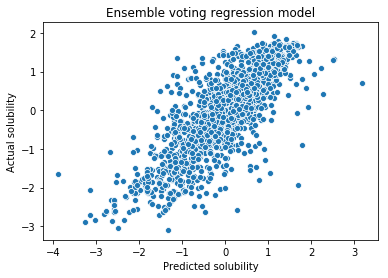

In [24]:
sns.scatterplot(y_pred,y_test).set(title='Ensemble voting regression model')

#specify axis labels
plt.xlabel('Predicted solubility')
plt.ylabel('Actual solubility')

### 3.2 Support vector machine regression

In [25]:
from sklearn.svm import SVR

# x_train, x_test, y_train, y_test already established and scaled previously

SVRmodel = SVR()
SVRmodel.fit(x_train,y_train)

y_pred = SVRmodel.predict(x_test)


# checking model accuracy

# MEAN ABSOLUTE ERROR
mae = mean_absolute_error(y_test,y_pred)
mae = np.round(mae,decimals=2)
print('\nmean absolute error on test dataset is ', mae)

# R2-score
r2 = r2_score(y_test, y_pred)
r2 = np.round(r2,decimals=2)
print('\nr2_score of prediction vrs actual values are: ', r2)


mean absolute error on test dataset is  0.43

r2_score of prediction vrs actual values are:  0.6


Text(0, 0.5, 'Actual solubility')

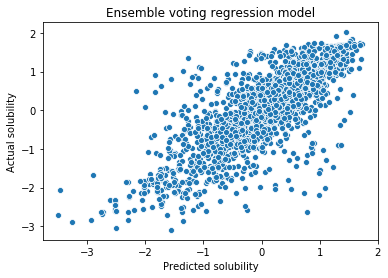

In [26]:
sns.scatterplot(y_pred,y_test).set(title='Ensemble voting regression model')

#specify axis labels
plt.xlabel('Predicted solubility')
plt.ylabel('Actual solubility')

### 3.3 Linear regression regression

In [27]:
# import model
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(x_train, y_train)

# pair the feature names with the coefficients
list(zip(predictor_columns, linreg.coef_)) # most effect with HeavyAtomCount

[('MolWt', -0.979434623836586),
 ('MolMR', -0.6636370511023695),
 ('HeavyAtomCount', -2.416206046713106),
 ('NumHDonors', 0.1429769256151858),
 ('NumRotatableBonds', 0.12434130047285645),
 ('NumValenceElectrons', 1.750502397721504),
 ('NumAromaticRings', -0.23948191459557794),
 ('NumAliphaticRings', 0.06150635867079297),
 ('RingCount', -0.15072594266305758),
 ('TPSA', 0.29003279428568424),
 ('LabuteASA', 0.9018884913383547),
 ('BertzCT', 1.0279095921334713)]

In [28]:
# make predictions on the testing set
y_pred = linreg.predict(x_test)

# MEAN ABSOLUTE ERROR
mae = mean_absolute_error(y_test,y_pred)
mae = np.round(mae,decimals=2)
print('\nmean absolute error on test dataset is ', mae)

# R2-score
r2 = r2_score(y_test, y_pred)
r2 = np.round(r2,decimals=2)
print('\nr2_score of prediction vrs actual values are: ', r2)


mean absolute error on test dataset is  0.56

r2_score of prediction vrs actual values are:  0.4


Text(0, 0.5, 'Actual solubility')

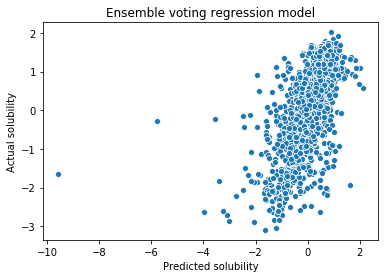

In [29]:
sns.scatterplot(y_pred,y_test).set(title='Ensemble voting regression model')

#specify axis labels
plt.xlabel('Predicted solubility')
plt.ylabel('Actual solubility')

### 3.4 Ridge regression

In [30]:
from sklearn.linear_model import Ridge
rdge = Ridge(alpha=1.0)
rdge.fit(x_train,y_train)

y_pred = rdge.predict(x_test)


# checking model accuracy

# MEAN ABSOLUTE ERROR
mae = mean_absolute_error(y_test,y_pred)
mae = np.round(mae,decimals=2)
print('\nmean absolute error on test dataset is ', mae)

# R2-score
r2 = r2_score(y_test, y_pred)
r2 = np.round(r2,decimals=2)
print('\nr2_score of prediction vrs actual values are: ', r2)


mean absolute error on test dataset is  0.56

r2_score of prediction vrs actual values are:  0.39


### 3.5 Lasso regression

In [31]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha=0.1)
reg.fit(x_train,y_train)

y_pred = reg.predict(x_test)


# checking model accuracy

# MEAN ABSOLUTE ERROR
mae = mean_absolute_error(y_test,y_pred)
mae = np.round(mae,decimals=2)
print('\nmean absolute error on test dataset is ', mae)

# R2-score
r2 = r2_score(y_test, y_pred)
r2 = np.round(r2,decimals=2)
print('\nr2_score of prediction vrs actual values are: ', r2)


mean absolute error on test dataset is  0.63

r2_score of prediction vrs actual values are:  0.3


### 3.6 Ensemble voting regression

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.neighbors import KNeighborsRegressor

r1 = LinearRegression()
r2 = RandomForestRegressor(n_estimators=10, random_state=1)
r3 = KNeighborsRegressor()
r4 = SVR()
r5 = MLPRegressor(random_state=7, max_iter=500)

er = VotingRegressor([('lr', r1), ('rf', r2), ('knn', r3),('svr',r4),('r5',r5)])
er.fit(x_train,y_train)

y_pred = er.predict(x_test)

# checking model accuracy

# MEAN ABSOLUTE ERROR
mae = mean_absolute_error(y_test,y_pred)
mae = np.round(mae,decimals=2)
print('\nmean absolute error on test dataset is ', mae)

# R2-score
r2 = r2_score(y_test, y_pred)
r2 = np.round(r2,decimals=2)
print('\nr2_score of prediction vrs actual values are: ', r2)


mean absolute error on test dataset is  0.4

r2_score of prediction vrs actual values are:  0.67


Text(0, 0.5, 'Actual solubility')

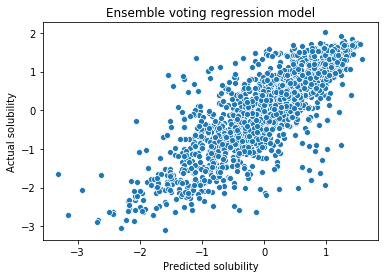

In [33]:
sns.scatterplot(y_pred,y_test).set(title='Ensemble voting regression model')

#specify axis labels
plt.xlabel('Predicted solubility')
plt.ylabel('Actual solubility')

### 3.7 Regression summary

Tested regression models in accuracy order:

1. Ensemble voting regressor (MAE = 0.4, r2 = 0.67)
2. Neural network (MAE = 0.41, r2 = 0.65)
3. Support vector machine regression (MAE = 0.43, r2 = 0.6)
4. Linear regression (MAE = 0.56, r2 = 0.4)
5. Ridge regression (MAE = 0.56, r2 = 0.39)
6. Lasso regression (MAE = 0.63, r2 = 0.3)


# 4. Predicting molecule's solubility class

Neural network is used

In [34]:
from sklearn.neural_network import MLPRegressor

# teaching a neural network with training data 
NN = MLPRegressor(random_state=7, max_iter=500).fit(x_train, y_train)

# predicting with trained neural network model
y_pred = NN.predict(x_test)

Descaling solubility-values

In [35]:
#Descaling so that solubility values can be converted to solubility classes

#Converting dimensions for standardscaler to work
y_pred = y_pred.reshape(-1,1)
y_test = y_test.reshape(-1,1)

#Descale
y_pred = scy.inverse_transform(y_pred)
y_test = scy.inverse_transform(y_test)

In [36]:
#Convert categories to number-values for model building
CategoryPredictions = pd.DataFrame()

#Convert to 1D array so that pd.cut works
y_pred = pd.DataFrame(y_pred)
y_pred = y_pred.values.flatten()

y_test = pd.DataFrame(y_test)
y_test = y_test.values.flatten()


#Creating solubility categories based on solubility-values

#Predicted solubility categories
CategoryPredictions['categories_pred'] = pd.cut(y_pred, bins=[-1000,-4,-2,0,1000], 
                    labels=['Insoluble', 'Slightly soluble', 'Soluble','Highly soluble'])

CategoryPredictions['categories_pred'].replace(['Insoluble','Slightly soluble','Soluble','Highly soluble'],
                                               [0,1,2,3], inplace=True)

#True solubility categories

CategoryPredictions['categories_true'] = pd.cut(y_test, bins=[-1000,-4,-2,0,1000], 
                    labels=['Insoluble', 'Slightly soluble', 'Soluble','Highly soluble'])

CategoryPredictions['categories_true'].replace(['Insoluble','Slightly soluble','Soluble','Highly soluble'],
                                               [0,1,2,3], inplace=True)

#Check accuracy
from sklearn.metrics import accuracy_score
acc_NN = accuracy_score(CategoryPredictions['categories_pred'],CategoryPredictions['categories_true'])
print(acc_NN)

0.6369554331497246


Only 64 % accuracy in predicting molecule's solubility between 4 different classes.

How much better classification accuracy can we get, if it is good enough to know whether molecule
is soluble or highly soluble?

Solubility classes will therefore be:

Insoluble and slightly soluble molecules have solubility class code 0.
Soluble and highly soluble molecules have solubility class code 1.


In [37]:
#Convert categories to number-values for model building
CategoryPredictions = pd.DataFrame()

#Convert to 1D array so that pd.cut works
y_pred = pd.DataFrame(y_pred)
y_pred = y_pred.values.flatten()

y_test = pd.DataFrame(y_test)
y_test = y_test.values.flatten()


#Creating solubility categories based on solubility-values

#Predicted solubility categories
CategoryPredictions['categories_pred'] = pd.cut(y_pred, bins=[-1000,-4,-2,0,1000], 
                    labels=['Insoluble', 'Slightly soluble', 'Soluble','Highly soluble'])

CategoryPredictions['categories_pred'].replace(['Insoluble','Slightly soluble','Soluble','Highly soluble'],
                                               [0,0,1,1], inplace=True)

#True solubility categories

CategoryPredictions['categories_true'] = pd.cut(y_test, bins=[-1000,-4,-2,0,1000], 
                    labels=['Insoluble', 'Slightly soluble', 'Soluble','Highly soluble'])

CategoryPredictions['categories_true'].replace(['Insoluble','Slightly soluble','Soluble','Highly soluble'],
                                               [0,0,1,1], inplace=True)

#Check accuracy
from sklearn.metrics import accuracy_score
acc_NN = accuracy_score(CategoryPredictions['categories_pred'],CategoryPredictions['categories_true'])
print(acc_NN)

0.8202303455182774


Algorithm has 82 % prediction accuracy when classifying molecules between poorly soluble ('Insoluble','Slightly soluble') 
and well soluble ('Soluble','Highly soluble')